<a href="https://colab.research.google.com/github/ffalo64/rabbit_challenge/blob/main/3_7_activation_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 活性化関数

In [1]:
# 数値計算に使うライブラリ
import numpy as np
# グラフを描画するライブラリ
import matplotlib.pyplot as plt
# ggplot スタイルを指定
plt.style.use('ggplot')
# グラフをNotebook内に表示させるための指定
%matplotlib inline

## 関数について

関数とは、渡された入力値（引数）を元に、何らかの処理を施し、新たな出力値を生成・返却するものである。但し、プログラミングにおける関数では、入力値と出力値は必須ではない。関数を$f$、入力値を$x$、出力値を$y$とすると、

$$
y=f(x) \qquad (式1)
$$

のように数式表現される。

関数を示す文字は任意に指定できるが、一般に、function（関数）の頭文字である$f$が用いられ、$f$と別の関数であることを示す文字として$g$や$h$（アルファベット順）が用いられる。また、特定の関数には、特定の文字が用いられることがある。例えば、シグモイド関数を示す文字として$\sigma$が用いられることがある。

式1における入力値$x$、関数$f$、出力値$y$の関係をデータフロー図（<abbr title="Data Flow Diagram">DFD</abbr>）を用いて、

<fig>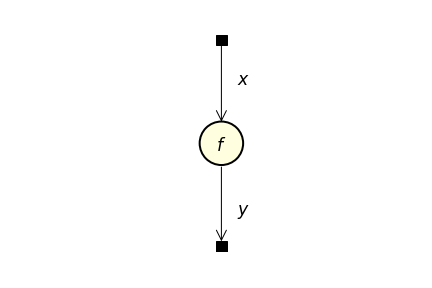
<figcaption>図1: 式1のデータフロー図</figcaption>
</fig>

のように図示することができる。

図1の矢印の図形はデータの流れ（Data Flow）、円の図形は処理を意味する。$x$に$f$を作用させることによって$y$に変換されたことを表している。$x$は素材、$f$はfactory（工場）やfabricator（加工業者）、$y$は出荷品に喩えられる。

関数は「函数」と表記されることがある。$x$を$f$という「函＝箱」の中に入れ、そこで$y$に変換されて取り出されるイメージである。

機械学習モデルは、関数である。例えば、単回帰分析（説明変数が1つの線形回帰）モデリングで得られた機械学習モデルは、入力データを$x$、回帰係数（傾き）を$\beta_{1}$、切片を$\beta_{0}$とすると、

$$
f(x) = \beta_{1}x + \beta_{0} \qquad (式2)
$$

のように数式表現することが可能である。

式2の$\beta_{1}$と$\beta_{0}$に具体的な数値を当てはめてみよう。例えば、$\beta_{1}=2.5$、$\beta_{0}=5$とすると、

$$
f(x) = 2.5x + 5 \qquad (式3)
$$

となる。

式3を元にプログラミング言語Pythonコード（以下、コード）を実装すると、次のようになる。

In [2]:
def f(x):
    """f
       
       $f(x) = 2.5x + 5$
    """
    return 2.5*x + 5.0

$$
-6 \leq x \leq 6
$$

として図示すると、次のようになる。

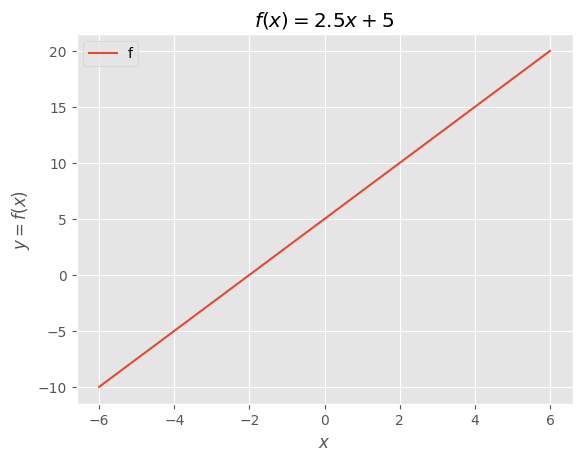

In [3]:
x = np.arange(-600, 601, 1) * 0.01
y = f(x)

_, ax = plt.subplots()
ax.plot(x, y, label=f.__doc__.split("\n")[0].strip())
ax.set_xlabel("$x$")
ax.set_ylabel("$y=f(x)$")
ax.set_title(f.__doc__.split("\n")[2].strip())
ax.legend()

plt.show()

## 活性化関数について

ニューラルネットワークの順伝播（forward）では、線形変換で得た値に対して、非線形な変換を行う。非線形な変換を行う際に用いられる関数を、活性化関数という。

入力データ（説明変数）を$x$、総入力データを$u$、中間層出力データを$z$、出力データ（予測データ）を$y$、重みを$W$、バイアスを$b$とする、入力層サイズ$3$、中間層サイズ$2 \times 1$、出力層サイズ$2$のニューラルネットワークは、

<fig>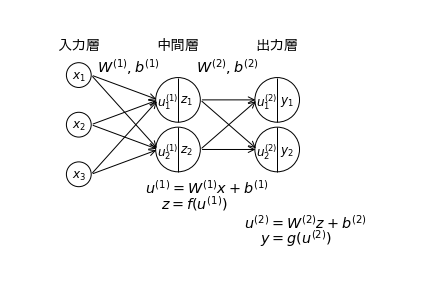
<figcaption>図2: ニューラルネットワーク</figcaption>
</fig>

のように図示することができる。

図2の中の数式

$$
\begin{eqnarray*}
u^{(1)} &=& W^{(1)}x + b^{(1)} \\
z &=& f(u^{(1)}) \\
\\
u^{(2)} &=& W^{(2)}z + b^{(2)} \\
y &=& g(u^{(2)}) \\
\end{eqnarray*}
$$

の、$f$を「中間層に用いる活性化関数」、$g$を「出力層に用いる活性化関数」という。

今日では一般に、ニューラルネットワークの学習（パラメータの探索）では、逆伝播（backward）アルゴリズムとして、微分法における連鎖律を利用した誤差逆伝播法が用いられる。そのため、微分可能、かつ渡された値から直接的に微分値を求める導関数が利用できるという要件を満たした活性化関数が用いられる傾向にある。関数$f$の導関数は、$\frac{\partial}{\partial x}f$または$f^{\prime}$と表す。

図2をKerasを用いて実装すると、次のようになる。活性化関数は、`keras.layers.Activation`で指定する。

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(2, input_dim=3))  # 中間層サイズx2, 入力層サイズx3
model.add(Activation('relu'))     # 中間層に用いる活性化関数
model.add(Dense(2))               # 出力層サイズx2,
model.add(Activation('softmax'))  # 出力層に用いる活性化関数

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 8         
                                                                 
 activation (Activation)     (None, 2)                 0         
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 activation_1 (Activation)   (None, 2)                 0         
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


## 中間層に用いる活性化関数

### ステップ関数

- 別名: 階段関数
- 入力値が閾値以上のときは$1$（活性化）、それ以外のときは$0$（不活性化）
- 閾値は基本的には$0$
- 誤差逆伝播法が普及する以前に用いられていた
- 導関数における入力値$0$は、微分不可能。それ以外の微分値は$0$。したがって、誤差逆伝播法に用いることはできない
- 導関数の実装では、入力値$0$の微分値を定義した劣微分が用いられる
- ヘヴィサイドの階段関数（Heaviside step function）とは異なり、入力値$0$のときの出力値が定義されている

入力値を$x$として当該関数（順伝播）とその導関数（逆伝播）を数式表現すると、次のようになる。

$$
\begin{eqnarray*}
f(x) &=& \left\{
    \begin{array}{ll}
    1 & (x \geq 0) \\
    0 & (x < 0)
    \end{array}
    \right. \\
\\
\frac{\partial}{\partial x}f(x) &=& \left\{
    \begin{array}{ll}
    微分不可能 & (x = 0) \\
    0 & (x \neq 0)
    \end{array}
    \right.
\end{eqnarray*}
$$

数式を元にコードを実装すると、次のようになる。

In [5]:
def step_function(x):
    """forward
       
       step
       ステップ関数
       (閾値0)
    """
    return np.where(x >= 0.0, 1.0, 0.0)

def d_step_function(x):
    """backward
       
       derivative of step
       ステップ関数の導関数
       (閾値0)
    """
    dx = np.where(x == 0.0, np.nan, 0.0)
    return dx

# def d_step_function(x):
#     """derivative of step
#        ステップ関数の導関数
#        (閾値0, xが0.0のときの微分値を定義した劣微分)
#     """
#     dx = np.zeros_like(x)
#     return dx

$$
-6 \leq x \leq 6
$$

として図示すると、次のようになる。

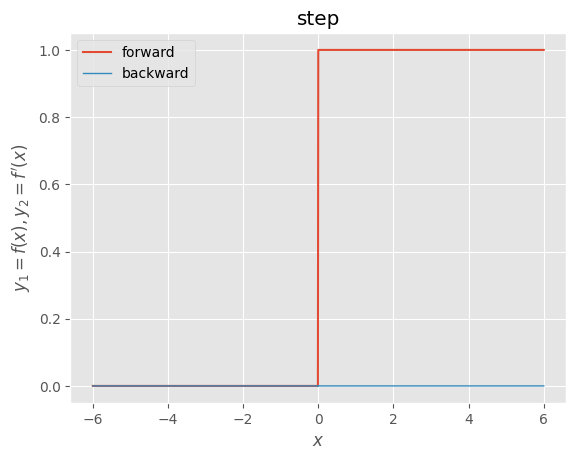

In [6]:
x = np.arange(-600, 601, 1) * 0.01
f, d, = step_function, d_step_function
y1, y2 = f(x), d(x)

_, ax = plt.subplots()
ax.plot(x, y1, label=f.__doc__.split("\n")[0].strip())
ax.plot(x, y2, label=d.__doc__.split("\n")[0].strip(), linewidth=1.0)
ax.set_xlabel("$x$")
ax.set_ylabel("$y_{1}=f(x), y_{2}=f^{\prime}(x)$")
ax.set_title(f.__doc__.split("\n")[2].strip())
ax.legend()

plt.show()

### シグモイド関数

- 別名: 標準シグモイド関数、ロジスティック・シグモイド関数（ゲイン$1$）
- 省略表記として、$\sigma$がよく用いられる
- 誤差逆伝播法の黎明期によく用いられた
- 導関数の最大値が$0.25$であり、入力値が$0$から遠ざかるほど$0$に近い微分値を取るため、中間層を深く重ねるほど勾配消失が発生しやすくなる（勾配消失問題）

入力値を$x$として当該関数（順伝播）とその導関数（逆伝播）を数式表現すると、次のようになる。

$$
\begin{eqnarray*}
f(x) &=& \frac{1}{1+e^{-x}} \\
&=& \frac{1}{1+\exp{(-x)}} \\
\\
\frac{\partial}{\partial x}f(x) &=& f(x)(1 - f(x))
\end{eqnarray*}
$$

数式を元にコードを実装すると、次のようになる。

In [7]:
def sigmoid(x):
    """forward
       
       sigmoid
       シグモイド関数
    """
    return 1.0 / (1.0 + np.exp(-x))

def d_sigmoid(x):
    """backward
       
       derivative of sigmoid
       シグモイド関数の導関数
    """
    dx = sigmoid(x) * (1.0 - sigmoid(x))
    return dx

$$
-6 \leq x \leq 6
$$

として図示すると、次のようになる。

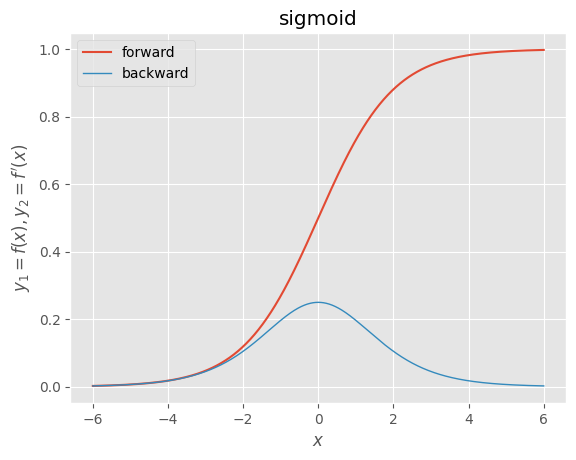

In [8]:
x = np.arange(-600, 601, 1) * 0.01
f, d = sigmoid, d_sigmoid
y1, y2 = f(x), d(x)

_, ax = plt.subplots()
ax.plot(x, y1, label=f.__doc__.split("\n")[0].strip())
ax.plot(x, y2, label=d.__doc__.split("\n")[0].strip(), linewidth=1.0)
ax.set_xlabel("$x$")
ax.set_ylabel("$y_{1}=f(x), y_{2}=f^{\prime}(x)$")
ax.set_title(f.__doc__.split("\n")[2].strip())
ax.legend()

plt.show()

### <abbr title="hyperbolic tangent function">tanh</abbr>

- 別名: 双曲線正接関数
- シグモイド関数の代替とみなされていた
- 導関数の最大値が$1$であり、シグモイド関数の$0.25$以上だが、それでも入力値が$0$から遠ざかるほど$0$に近い微分値を取るため、中間層を深く重ねるほど勾配消失が発生しやすくなる

入力値を$x$として当該関数（順伝播）とその導関数（逆伝播）を数式表現すると、次のようになる。

$$
\begin{eqnarray*}
f(x) &=& \tanh{x} &(1) \\
&=& \frac{\sinh{x}}{\cosh{x}}  \qquad &(2) \\
&=& \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}  \qquad &(3) \\
&=& \frac{e^{2x}-1}{e^{2x}+1}  \qquad &(4) \\
&=& 2 \cdot \sigma(2x) - 1 &(5) \qquad [\sigma はシグモイド関数]\\
\\
\frac{\partial}{\partial x}f(x) &=& \frac{1}{\cosh^{2}{x}} &(1) \\
&=& \frac{4}{(e^{x}+e^{-x})^{2}} &(2)
\end{eqnarray*}
$$

数式を元にコードを実装すると、次のようになる。

In [9]:
def tanh(x):
    """forward
       
       tanh
       双曲線正接関数
       (1)
    """
    return np.tanh(x)

# def tanh(x):
#     """forward
#        
#        tanh
#        双曲線正接関数
#        (2)
#     """
#     return np.sinh(x) / np.cosh(x)
#
# def tanh(x):
#     """forward
#        
#        tanh
#        双曲線正接関数
#        (3)
#     """
#     return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
#
# def tanh(x):
#     """forward
#        
#        tanh
#        双曲線正接関数
#        (4)
#     """
#     return (np.exp(2.0*x) - 1.0) / (np.exp(2.0*x) + 1.0)
#
# def tanh(x):
#     """forward
#        
#        tanh
#        双曲線正接関数
#        (5)
#     """
#     return 2.0 * sigmoid(2.0*x) - 1.0

def d_tanh(x):
    """backward
       
       derivative of tanh
       双曲線正接関数の導関数
       (1)
    """
    dx = 1.0 / np.square(np.cosh(x))
    return dx

# def d_tanh(x):
#     """backward
#        
#        derivative of tanh
#        双曲線正接関数の導関数
#        (2)
#     """
#     dx = 4.0 / np.square(np.exp(x) + np.exp(-x))
#     return dx

$$
-6 \leq x \leq 6
$$

として図示すると、次のようになる。

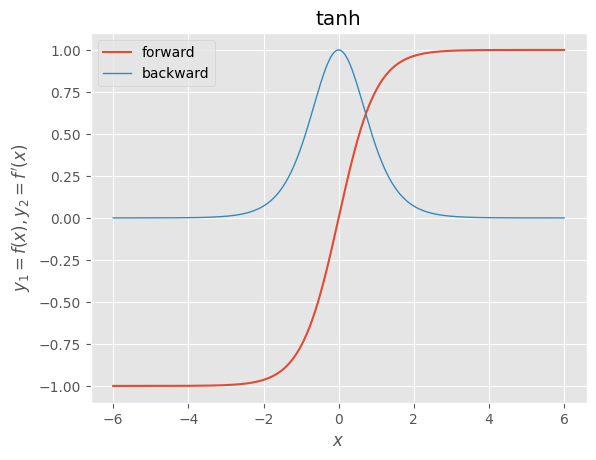

In [10]:
x = np.arange(-600, 601, 1) * 0.01
f, d = tanh, d_tanh
y1, y2 = f(x), d(x)

_, ax = plt.subplots()
ax.plot(x, y1, label=f.__doc__.split("\n")[0].strip())
ax.plot(x, y2, label=d.__doc__.split("\n")[0].strip(), linewidth=1.0)
ax.set_xlabel("$x$")
ax.set_ylabel("$y_{1}=f(x), y_{2}=f^{\prime}(x)$")
ax.set_title(f.__doc__.split("\n")[2].strip())
ax.legend()

plt.show()

### <abbr title="Rectified Linear Unit">ReLU</abbr>

- 別名: 正規化線形関数、ランプ関数
- 入力値が$0$以上のときは入力値と同じ値、それ以外のときは$0$
- 導関数はヘヴィサイドの階段関数
- 原点において不連続（微分不可能な点が存在する）
- 導関数の実装では、入力値$0$の微分値を定義した劣微分が用いられる
- 導関数における入力値が正のときの微分値が常に$1$なので、勾配消失が発生しにくい
- 導関数における入力値が負のとき、学習が進まない

入力値を$x$として当該関数（順伝播）とその導関数（逆伝播）を数式表現すると、次のようになる。

$$
\begin{eqnarray*}
f(x) &=& \left\{
    \begin{array}{ll}
    x & (x > 0) \\
    0 & (x \leq 0)
    \end{array}
    \right. \\
&=& \max{(0, x)} \\
\\
\frac{\partial}{\partial x}f(x) &=& \left\{
    \begin{array}{ll}
    1 & (x > 0) \\
    微分不可能 & (x = 0) \\
    0 & (x < 0)
    \end{array}
    \right.
\end{eqnarray*}
$$

数式を元にコードを実装すると、次のようになる。

In [11]:
def relu(x):
    """forward
       
       ReLU
       正規化線形関数
    """
    return np.maximum(0, x)

def d_relu(x):
    """backward
       
       derivative of ReLU
       正規化線形関数の導関数
    """
    dx = np.where(x > 0.0, 1.0, np.where(x < 0.0, 0.0, np.nan))
    return dx

# def d_relu(x):
#     """backward
#        
#        derivative of ReLU
#        正規化線形関数の導関数
#        (xが0.0のときの微分値を定義した劣微分)
#     """
#     dx = step_function(x)
#     return dx

$$
-6 \leq x \leq 6
$$

として図示すると、次のようになる。

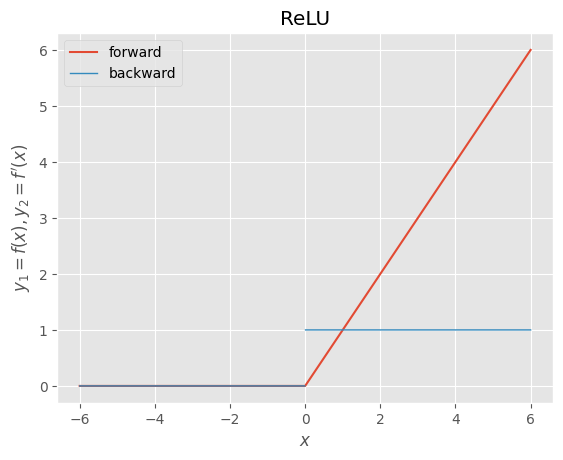

In [12]:
x = np.arange(-600, 601, 1) * 0.01
f, d = relu, d_relu
y1, y2 = f(x), d(x)

_, ax = plt.subplots()
ax.plot(x, y1, label=f.__doc__.split("\n")[0].strip())
ax.plot(x, y2, label=d.__doc__.split("\n")[0].strip(), linewidth=1.0)
ax.set_xlabel("$x$")
ax.set_ylabel("$y_{1}=f(x), y_{2}=f^{\prime}(x)$")
ax.set_title(f.__doc__.split("\n")[2].strip())
ax.legend()

plt.show()

### Leaky ReLU

- ReLUの亜種
- 別名: 漏洩正規化線形関数
- 入力値が$0$以上のときは入力値と同じ値、それ以外のときは入力値に定数$\alpha$を乗算したもの
- $\alpha$の値は基本的には$0.01$とする
- 原点において不連続（微分不可能な点が存在する）（ReLUと同じ）
- 導関数の実装では、入力値$0$の微分値を定義した劣微分が用いられる（ReLUと同じ）
- 導関数における入力値が正のときの微分値が常に$1$なので、勾配消失が発生しにくい（ReLUと同じ）
- 導関数における入力値が負のときは、小さな傾きの1次関数となる

入力値を$x$として当該関数（順伝播）とその導関数（逆伝播）を数式表現すると、次のようになる。

$$
\begin{eqnarray*}
f(x) &=& \left\{
    \begin{array}{ll}
    x & (x > 0) \\
    \alpha x & (x \leq 0) \qquad [\alphaは定数,\ 基本的には0.01とする]
    \end{array}
    \right. \\
&=& \max{(\alpha x, x)} \\
\\
\frac{\partial}{\partial x}f(x) &=& \left\{
    \begin{array}{ll}
    1 & (x > 0) \\
    微分不可能 & (x = 0) \\
    \alpha & (x < 0)
    \end{array}
    \right.
\end{eqnarray*}
$$

数式を元にコードを実装すると、次のようになる。

In [13]:
alpha = 0.01

def lrelu(x):
    """forward
       
       Leaky ReLU
       漏洩正規化線形関数
    """
    return np.maximum(alpha*x, x)

def d_lrelu(x):
    """backward
       
       derivative of Leaky ReLU
       漏洩正規化線形関数の導関数
    """
    dx = np.where(x > 0.0, 1.0, np.where(x < 0.0, alpha, np.nan))
    return dx

# def d_lrelu(x):
#     """backward
#        
#        derivative of Leaky ReLU
#        漏洩正規化線形関数の導関数
#        (xが0.0のときの微分値を定義した劣微分)
#     """
#     dx = np.where(x > 0.0, 1.0, alpha)
#     return dx

$$
-6 \leq x \leq 6
$$

として図示すると、次のようになる。

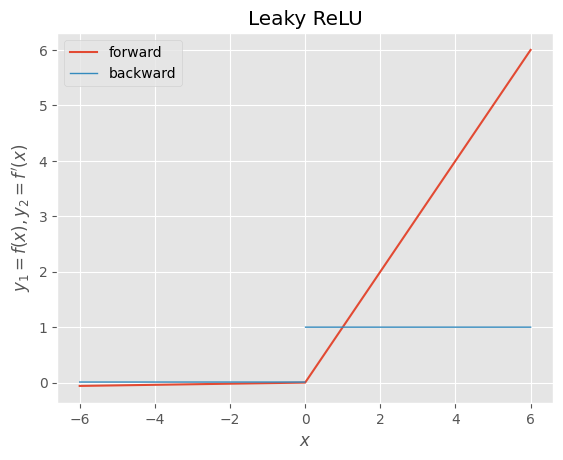

In [14]:
x = np.arange(-600, 601, 1) * 0.01
f, d = lrelu, d_lrelu
y1, y2 = f(x), d(x)

_, ax = plt.subplots()
ax.plot(x, y1, label=f.__doc__.split("\n")[0].strip())
ax.plot(x, y2, label=d.__doc__.split("\n")[0].strip(), linewidth=1.0)
ax.set_xlabel("$x$")
ax.set_ylabel("$y_{1}=f(x), y_{2}=f^{\prime}(x)$")
ax.set_title(f.__doc__.split("\n")[2].strip())
ax.legend()

plt.show()

### Swish

- ReLUの代替候補として注目
- 別名: シグモイド加重線形関数（<abbr title="Sigmoid-weighted Linear Unit">SiLU</abbr>）
- ReLUやLeaky ReLUとは異なり、原点において連続（微分不可能な点が存在しない）
- $\beta$の値は基本的に$1$とする
- $\beta$はパラメータでもハイパーパラメータでも可
- [関連論文: "Sigmoid-Weighted Linear Units for Neural Network Function Approximation in Reinforcement Learning"](https://arxiv.org/abs/1702.03118)
- [関連論文: "Searching for Activation Functions"](https://arxiv.org/abs/1710.05941)

入力値を$x$として当該関数（順伝播）とその導関数（逆伝播）を数式表現すると、次のようになる。

$$
\begin{eqnarray*}
f(x) &=& x \cdot \sigma(\beta x) \qquad [\sigma はシグモイド関数.\ \beta の値は基本的に1とする] \\
&=& \frac{x}{1 + e^{-\beta x}} \\
\\
\frac{\partial}{\partial x}f(x) &=& \beta f(x) + \sigma(\beta x)(1 - \beta f(x))
\end{eqnarray*}
$$

数式を元にコードを実装すると、次のようになる。

In [15]:
beta = 1.0

def swish(x):
    """forward
       
       Swish
       シグモイド加重線形関数
    """
    return x * sigmoid(beta*x)

def d_swish(x):
    """backward
       
       derivative of Swish
       シグモイド加重線形関数の導関数
    """
    dx = beta*swish(x) + sigmoid(beta*x)*(1.0 - beta*swish(x)) 
    return dx

$$
-6 \leq x \leq 6
$$

として図示すると、次のようになる。

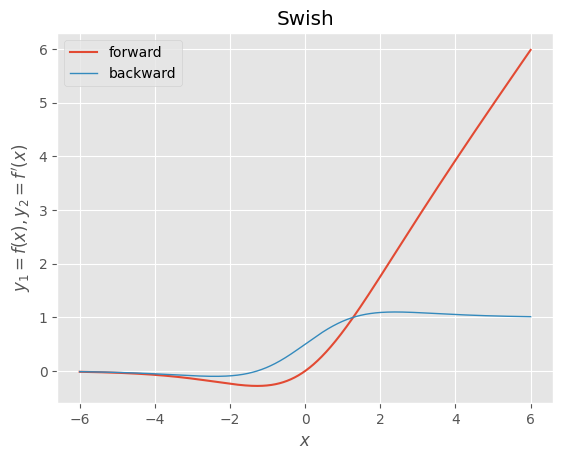

In [16]:
x = np.arange(-600, 601, 1) * 0.01
f, d = swish, d_swish
y1, y2 = f(x), d(x)

_, ax = plt.subplots()
ax.plot(x, y1, label=f.__doc__.split("\n")[0].strip())
ax.plot(x, y2, label=d.__doc__.split("\n")[0].strip(), linewidth=1.0)
ax.set_xlabel("$x$")
ax.set_ylabel("$y_{1}=f(x), y_{2}=f^{\prime}(x)$")
ax.set_title(f.__doc__.split("\n")[2].strip())
ax.legend()

plt.show()

## 出力層に用いる活性化関数

### 2値分類: シグモイド関数

- 出力層のサイズ（ユニット数）は$1$
- クラス番号$1$を正例または陽性（Positive）、クラス番号$0$を負例または陰性（Negative）と呼ぶ
- シグモイド関数の出力値を、正例である確信度（Positive confidence）と呼ぶ
- 正例である確信度の取り得る値は、$0$から$1$迄の範囲内
- 負例である確信度（Negative confidence）は、$1$に対して正例である確信度を減算して求める
- 分類するために、閾値を設定する
- 閾値は基本的には$0.5$
- 正例である確信度が閾値を上回るときは正例（クラス番号$1$）、それ以外は負例（クラス番号$0$）に分類する

シグモイド関数の数式、コード、及びグラフは、前述の「中間層における活性化関数」の「シグモイド関数」を参照。

### 多値分類: ソフトマックス関数

- 出力層のサイズ（ユニット数）はクラス数と同じ
- シグモイド関数を多値分類用に拡張したもの
- 出力値の総和が$1$

入力値を$\bf x$として当該関数（順伝播）とその導関数（逆伝播）を数式表現すると、次のようになる。

$$
\begin{eqnarray*}
g({\bf x})_{i} &=& \frac{e^{x_i}}{\sum_{k=1}^n e^{x_k}} \qquad \{i \in \mathbb{N} \mid 1 \leq i \leq n\} \\
\\
\frac{\partial}{\partial x}g({\bf x})_{i} &=& \left\{
    \begin{array}{ll}
    g({\bf x})_{i}(1 - g({\bf x})_{i}) & (i = j) \\
    -g({\bf x})_{i}g({\bf x})_{j} & (i \ne j)
    \end{array}
    \right. \\
&=& g({\bf x})_{i}(\delta_{ij} - g({\bf x})_{j})
\end{eqnarray*}
$$

数式を元にコードを実装すると、次のようになる。

In [17]:
def softmax(x):
    """forward
       
       softmax
       ソフトマックス関数
    """
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x)  # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))

def d_softmax(x):
    """backward
       
       derivative of softmax
       ソフトマックス関数の導関数
    """
    y = softmax(x)
    dx = -y[:,:,None] * y[:,None,:]       # ヤコビ行列を計算 (i≠jの場合)
    iy, ix = np.diag_indices_from(dx[0])  # 対角要素の添字を取得
    dx[:,iy,ix] = y * (1.0 - y)           # 対角要素値を修正 (i＝jの場合)
    return dx

$$
{\bf x} = \left(
    \begin{array}{cc}
    -6 & 0 \\
    -5.99 & 0 \\
    -5.98 & 0 \\
    \vdots & \vdots \\
    6 & 0
    \end{array}
    \right)
$$

として図示すると、次のようになる。

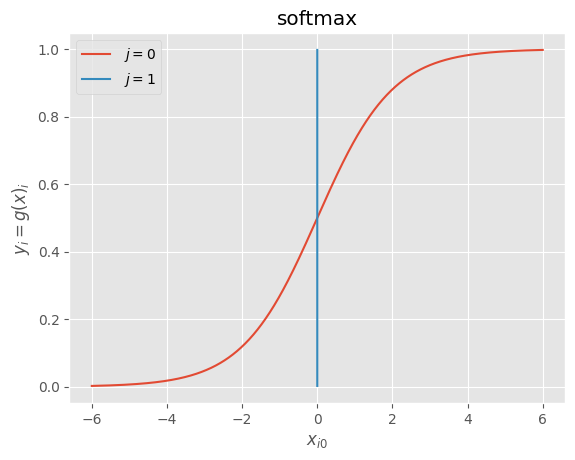

In [18]:
x = np.pad(np.arange(-600, 601, 1).reshape((-1, 1)) * 0.01, ((0, 0), (0, 1)), 'constant')
g = softmax
y = g(x)

_, ax = plt.subplots()
for j in range(x.shape[1]):
    ax.plot(x[:,j], y[:,j], label=r" $j={}$".format(j))
ax.set_xlabel("$x_{i0}$")
ax.set_ylabel("$y_{i}=g(x)_{i}$")
ax.set_title(g.__doc__.split("\n")[2].strip())
ax.legend()

plt.show()

### 回帰: 恒等関数 (活性化関数なし)

- 出力層のサイズ（ユニット数）は$1$
- 別名: 恒等写像、線形関数
- 出力値は入力値と同じ

入力値を$x$として当該関数（順伝播）とその導関数（逆伝播）を数式表現すると、次のようになる。

$$
\begin{eqnarray*}
g(x) &=& x \\
\\
\frac{\partial}{\partial x}g(x) &=& 1
\end{eqnarray*}
$$

数式を元にコードを実装すると、次のようになる。

In [19]:
def identity(x):
    """forward
       
       identity
       恒等関数
    """
    return x

def d_identity(x):
    """backward
       
       derivative of identity
       恒等関数の導関数
    """
    dx = np.ones_like(x)
    return dx

$$
-6 \leq x \leq 6
$$

として図示すると、次のようになる。

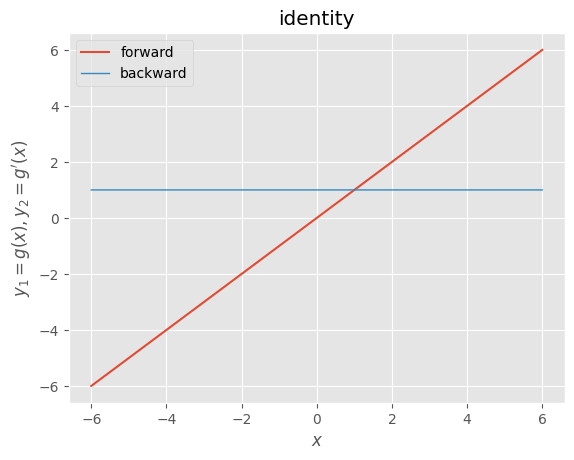

In [20]:
x = np.arange(-600, 601, 1) * 0.01
g, d = identity, d_identity
y1, y2 = g(x), d(x)

_, ax = plt.subplots()
ax.plot(x, y1, label=g.__doc__.split("\n")[0].strip())
ax.plot(x, y2, label=d.__doc__.split("\n")[0].strip(), linewidth=1.0)
ax.set_xlabel("$x$")
ax.set_ylabel("$y_{1}=g(x), y_{2}=g^{\prime}(x)$")
ax.set_title(g.__doc__.split("\n")[2].strip())
ax.legend()

plt.show()